# Artificial Intelligence Nanodegree
## Computer Vision Capstone
## Project: Facial Keypoint Detection

---

Welcome to the final Computer Vision project in the Artificial Intelligence Nanodegree program!  

In this project, you’ll combine your knowledge of computer vision techniques and deep learning to build and end-to-end facial keypoint recognition system! Facial keypoints include points around the eyes, nose, and mouth on any face and are used in many applications, from facial tracking to emotion recognition. 

There are three main parts to this project:

**Part 1** : Investigating OpenCV, pre-processing, and face detection

**Part 2** : Training a Convolutional Neural Network (CNN) to detect facial keypoints

**Part 3** : Putting parts 1 and 2 together to identify facial keypoints on any image!

---

**Here's what you need to know to complete the project:*

1. In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. 
    
    a. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 


2. In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. 
    
    a. Each section where you will answer a question is preceded by a **'Question X'** header. 
    
    b. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains **optional** suggestions for enhancing the project beyond the minimum requirements. If you decide to pursue the "(Optional)" sections, you should include the code in this IPython notebook.

Your project submission will be evaluated based on your answers to *each* of the questions and the code implementations you provide.  

### Steps to Complete the Project

Each part of the notebook is further broken down into separate steps.  Feel free to use the links below to navigate the notebook.

In this project you will get to explore a few of the many computer vision algorithms built into the OpenCV library.  This expansive computer vision library is now [almost 20 years old](https://en.wikipedia.org/wiki/OpenCV#History) and still growing! 

The project itself is broken down into three large parts, then even further into separate steps.  Make sure to read through each step, and complete any sections that begin with **'(IMPLEMENTATION)'** in the header; these implementation sections may contain multiple TODOs that will be marked in code.  For convenience, we provide links to each of these steps below.

**Part 1** : Investigating OpenCV, pre-processing, and face detection

* [Step 0](#step0): Detect Faces Using a Haar Cascade Classifier
* [Step 1](#step1): Add Eye Detection
* [Step 2](#step2): De-noise an Image for Better Face Detection
* [Step 3](#step3): Blur an Image and Perform Edge Detection
* [Step 4](#step4): Automatically Hide the Identity of an Individual

**Part 2** : Training a Convolutional Neural Network (CNN) to detect facial keypoints

* [Step 5](#step5): Create a CNN to Recognize Facial Keypoints
* [Step 6](#step6): Compile and Train the Model
* [Step 7](#step7): Visualize the Loss and Answer Questions

**Part 3** : Putting parts 1 and 2 together to identify facial keypoints on any image!

* [Step 8](#step7): Build a Robust Facial Keypoints Detector (Complete the CV Pipeline)



---
<a id='step0'></a>
## Step 0: Detect Faces Using a Haar Cascade Classifier

Have you ever wondered how Facebook automatically tags images with your friends' faces?   Or how high-end cameras automatically find and focus on a certain person's face?  Applications like these depend heavily on the machine learning task known as *face detection* -  which is the task of automatically finding faces in images containing people.  

At its root face detection is a classification problem - that is a problem of distinguishing between distinct classes of things.  With face detection these distinct classes are 1) images of human faces and 2) everything else. 

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `detector_architectures` directory.


### Import Resources 

In the next python cell, we load in the required libraries for this section of the project.

In [1]:
# Import required libraries for this section

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2                     # OpenCV library for computer vision
from PIL import Image
import time 

Next, we load in and display a test image for performing face detection.

*Note*: by default OpenCV assumes the ordering of our image's color channels are Blue, then Green, then Red.  This is slightly out of order with most image types we'll use in these experiments, whose color channels are ordered Red, then Green, then Blue.  In order to switch the Blue and Red channels of our test image around we will use OpenCV's ```cvtColor``` function, which you can read more about by [checking out some of its documentation located here](http://docs.opencv.org/3.2.0/df/d9d/tutorial_py_colorspaces.html).  This is a general utility function that can do other transformations too like converting a color image to grayscale, and transforming a standard color image to HSV color space.

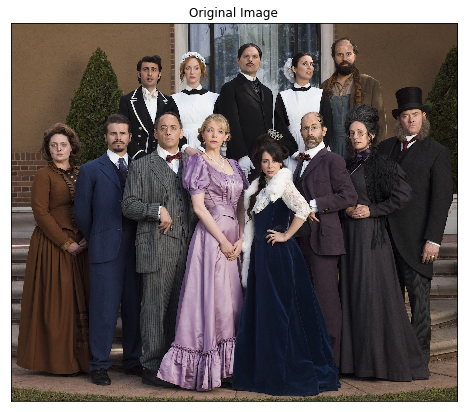

In [2]:
# Load in color image for face detection
image = cv2.imread('images/test_image_1.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot our image using subplots to specify a size and title
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

There are a lot of people - and faces - in this picture.  13 faces to be exact!  In the next code cell, we demonstrate how to use a Haar Cascade classifier to detect all the faces in this test image.

This face detector uses information about patterns of intensity in an image to reliably detect faces under varying light conditions. So, to use this face detector, we'll first convert the image from color to grayscale. 

Then, we load in the fully trained architecture of the face detector -- found in the file *haarcascade_frontalface_default.xml* - and use it on our image to find faces! 

To learn more about the parameters of the detector see [this post](https://stackoverflow.com/questions/20801015/recommended-values-for-opencv-detectmultiscale-parameters).

Number of faces detected: 13


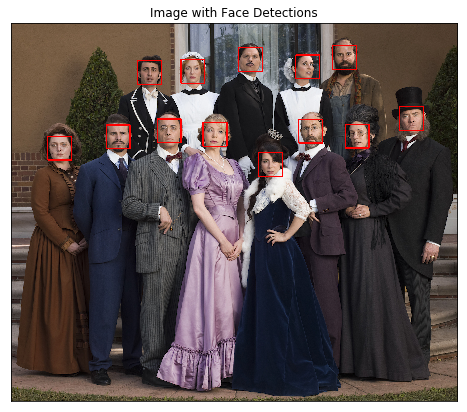

In [3]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detections')
ax1.imshow(image_with_detections)

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

---
<a id='step1'></a>

## Step 1: Add Eye Detections

There are other pre-trained detectors available that use a Haar Cascade Classifier - including full human body detectors, license plate detectors, and more.  [A full list of the pre-trained architectures can be found here](https://github.com/opencv/opencv/tree/master/data/haarcascades). 

To test your eye detector, we'll first read in a new test image with just a single face.

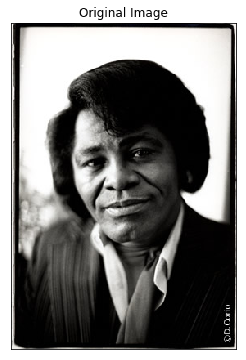

In [4]:
# Load in color image for face detection
image = cv2.imread('images/james.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the RGB image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

Notice that even though the image is a black and white image, we have read it in as a color image and so it will still need to be converted to grayscale in order to perform the most accurate face detection.

So, the next steps will be to convert this image to grayscale, then load OpenCV's face detector and run it with parameters that detect this face accurately.

Number of faces detected: 1


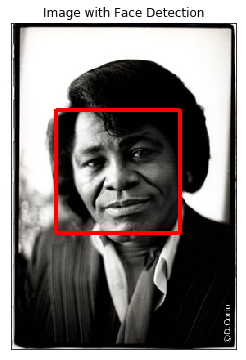

In [5]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detection')
ax1.imshow(image_with_detections)

### (IMPLEMENTATION) Add an eye detector to the current face detection setup.  

A Haar-cascade eye detector can be included in the same way that the face detector was and, in this first task, it will be your job to do just this.

To set up an eye detector, use the stored parameters of the eye cascade detector, called ```haarcascade_eye.xml```, located in the `detector_architectures` subdirectory.  In the next code cell, create your eye detector and store its detections.

**A few notes before you get started**: 

First, make sure to give your loaded eye detector the variable name

``eye_cascade``


and give the list of eye regions you detect the variable name 

``eyes``

Second, since we've already run the face detector over this image, you should only search for eyes *within the rectangular face regions detected in ``faces``*.  This will minimize false detections.

Lastly, once you've run your eye detector over the facial detection region, you should display the RGB image with both the face detection boxes (in red) and your eye detections (in green) to verify that everything works as expected.

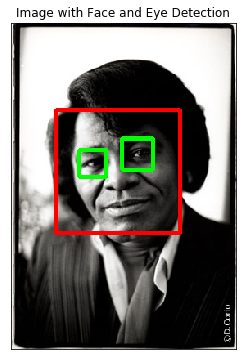

In [6]:
# Make a copy of the original image to plot rectangle detections
image_with_detections = np.copy(image)   

# Loop over the detections and draw their corresponding face detection boxes
for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h),(255,0,0), 3)  
    
# Do not change the code above this comment!

    
## TODO: Add eye detection, using haarcascade_eye.xml, to the current face detector algorithm
## TODO: Loop over the eye detections and draw their corresponding boxes in green on image_with_detections
eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

for (x,y,w,h) in faces:
    image_face_rect = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(image_face_rect)
    
    for (x_e,y_e,w_e,h_e) in eyes:
        # Add a green bounding box to the detections image
        cv2.rectangle(image_with_detections, (x + x_e, y + y_e), (x + x_e + w_e, y + y_e + h_e), (0,255,0), 3)
    

# Plot the image with both faces and eyes detected
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face and Eye Detection')
ax1.imshow(image_with_detections)

## (Optional) Add face and eye detection to your laptop camera

It's time to kick it up a notch, and add face and eye detection to your laptop's camera!  Afterwards, you'll be able to show off your creation like in the gif shown below - made with a completed version of the code!  

<img src="images/laptop_face_detector_example.gif" width=400 height=300/>

Notice that not all of the detections here are perfect - and your result need not be perfect either.   You should spend a small amount of time tuning the parameters of your detectors to get reasonable results, but don't hold out for perfection.  If we wanted perfection we'd need to spend a ton of time tuning the parameters of each detector, cleaning up the input image frames, etc. You can think of this as more of a rapid prototype. 

The next cell contains code for a wrapper function called ``laptop_camera_face_eye_detector`` that, when called, will activate your laptop's camera.  You will place the relevant face and eye detection code in this wrapper function to implement face/eye detection and mark those detections on each image frame that your camera captures.

Before adding anything to the function, you can run it to get an idea of how it works - a small window should pop up showing you the live feed from your camera; you can press any key to close this window.

**Note:** Mac users may find that activating this function kills the kernel of their notebook every once in a while.  If this happens to you, just restart your notebook's kernel, activate cell(s) containing any crucial import statements, and you'll be good to go!

In [7]:
### Add face and eye detection to this laptop camera function 
# Make sure to draw out all faces/eyes found in each frame on the shown video feed

import cv2
import time 

# wrapper function for face/eye detection with your laptop camera
def laptop_camera_go():
    # Extract the pre-trained face and eye detectors from xml files
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.avi',fourcc, 10.0, (640,480))

    # Keep the video stream open
    while rval:
        
        # Convert the RGB  image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

        # Detect the faces in image
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)
        
        # Make a copy of the orginal image to draw face detections on
        image_with_detections = np.copy(frame)

        # Get the bounding box for each detected face
        for (x,y,w,h) in faces:
            image_face_rect = gray[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(image_face_rect, 1.2, 6)            
            
            for (x_e,y_e,w_e,h_e) in eyes:
                # Add a green bounding box to the detections image
                cv2.rectangle(image_with_detections, (x + x_e, y + y_e), (x + x_e + w_e, y + y_e + h_e), (0,255,0), 3)            
        
            # Add a red bounding box to the detections image
            cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)

        # write the frame
        out.write(image_with_detections)
        
        # Plot the image from camera with all the face and eye detections marked
        cv2.imshow("face detection activated", image_with_detections)
        
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # Exit by pressing any key
            vc.release()
            out.release()

            # Destroy windows 
            cv2.destroyAllWindows()
          
            # Make sure window closes on OSx
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    

In [8]:
# Call the laptop camera face/eye detector function above
laptop_camera_go()

<img src="images/eyes.gif" width=400 height=300/>

---
<a id='step2'></a>

## Step 2: De-noise an Image for Better Face Detection

Image quality is an important aspect of any computer vision task. Typically, when creating a set of images to train a deep learning network, significant care is taken to ensure that training images are free of visual noise or artifacts that hinder object detection.  While computer vision algorithms - like a face detector - are typically trained on 'nice' data such as this, new test data doesn't always look so nice!

When applying a trained computer vision algorithm to a new piece of test data one often cleans it up first before feeding it in.  This sort of cleaning - referred to as *pre-processing* - can include a number of cleaning phases like blurring, de-noising, color transformations, etc., and many of these tasks can be accomplished using OpenCV.

In this short subsection we explore OpenCV's noise-removal functionality to see how we can clean up a noisy image, which we then feed into our trained face detector.

### Create a noisy image to work with

In the next cell, we create an artificial noisy version of the previous multi-face image.  This is a little exaggerated - we don't typically get images that are this noisy - but [image noise](https://digital-photography-school.com/how-to-avoid-and-reduce-noise-in-your-images/), or 'grainy-ness' in a digitial image - is a fairly common phenomenon.

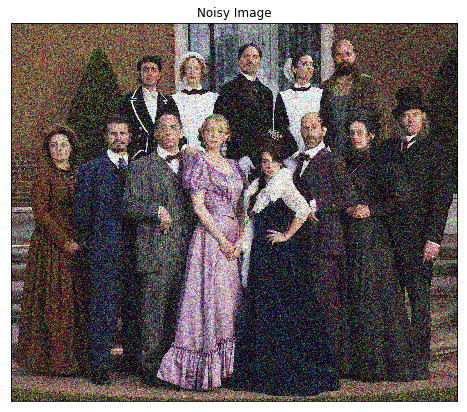

In [9]:
# Load in the multi-face test image again
image = cv2.imread('images/test_image_1.jpg')

# Convert the image copy to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Make an array copy of this image
image_with_noise = np.asarray(image)

# Create noise - here we add noise sampled randomly from a Gaussian distribution: a common model for noise
noise_level = 45
noise = np.random.randn(image.shape[0],image.shape[1],image.shape[2])*noise_level

# Add this noise to the array image copy
image_with_noise = image_with_noise + noise

# Convert back to uint8 format
image_with_noise = np.asarray([np.uint8(np.clip(i,0,255)) for i in image_with_noise])

# Plot our noisy image!
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image')
ax1.imshow(image_with_noise)

In the context of face detection, the problem with an image like this is that  - due to noise - we may miss some faces or get false detections.  

In the next cell we apply the same trained OpenCV detector with the same settings as before, to see what sort of detections we get.

Number of faces detected: 12


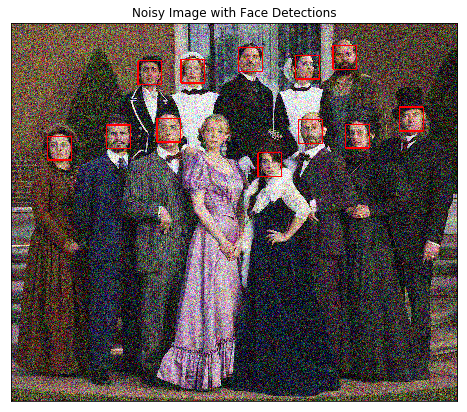

In [10]:
# Convert the RGB  image to grayscale
gray_noise = cv2.cvtColor(image_with_noise, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray_noise, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image_with_noise)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image with Face Detections')
ax1.imshow(image_with_detections)

With this added noise we now miss one of the faces!

### (IMPLEMENTATION) De-noise this image for better face detection

Time to get your hands dirty: using OpenCV's built in color image de-noising functionality called ```fastNlMeansDenoisingColored``` - de-noise this image enough so that all the faces in the image are properly detected.  Once you have cleaned the image in the next cell, use the cell that follows to run our trained face detector over the cleaned image to check out its detections.

You can find its [official documentation here]([documentation for denoising](http://docs.opencv.org/trunk/d1/d79/group__photo__denoise.html#ga21abc1c8b0e15f78cd3eff672cb6c476) and [a useful example here](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_photo/py_non_local_means/py_non_local_means.html).


**Note:** you can keep all parameters *except* `photo_render` fixed as shown in the second link above.  Play around with the value of this parameter - see how it affects the resulting cleaned image.

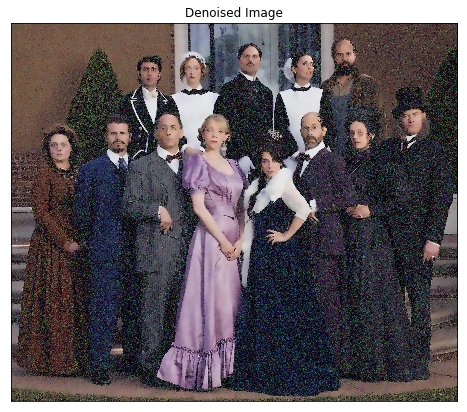

In [11]:
## TODO: Use OpenCV's built in color image de-noising function to clean up our noisy image!


denoised_image = cv2.fastNlMeansDenoisingColored(image_with_noise, None, 20, 20, 7, 21)

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Denoised Image')
ax1.imshow(denoised_image)

Number of faces detected: 13


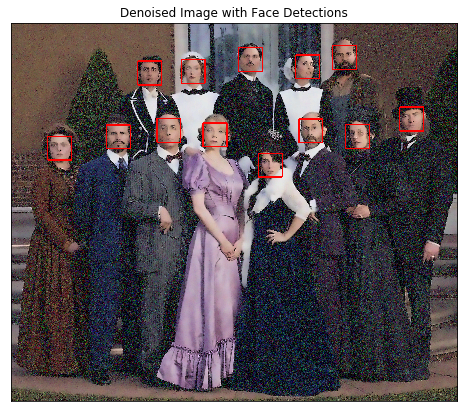

In [40]:
## TODO: Run the face detector on the de-noised image to improve your detections and display the result
# Convert the RGB  image to grayscale
gray_denoised = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray_denoised, 2, 4)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(denoised_image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Denoised Image with Face Detections')
ax1.imshow(image_with_detections)

---
<a id='step3'></a>

## Step 3: Blur an Image and Perform Edge Detection

Now that we have developed a simple pipeline for detecting faces using OpenCV - let's start playing around with a few fun things we can do with all those detected faces!

### Importance of Blur in Edge Detection

Edge detection is a concept that pops up almost everywhere in computer vision applications, as edge-based features (as well as features built on top of edges) are often some of the best features for e.g., object detection and recognition problems.

Edge detection is a dimension reduction technique - by keeping only the edges of an image we get to throw away a lot of non-discriminating information.  And typically the most useful kind of edge-detection is one that preserves only the important, global structures (ignoring local structures that aren't very discriminative).  So removing local structures / retaining global structures is a crucial pre-processing step to performing edge detection in an image, and blurring can do just that.  

Below is an animated gif showing the result of an edge-detected cat [taken from Wikipedia](https://en.wikipedia.org/wiki/Gaussian_blur#Common_uses), where the image is gradually blurred more and more prior to edge detection.  When the animation begins you can't quite make out what it's a picture of, but as the animation evolves and local structures are removed via blurring the cat becomes visible in the edge-detected image.

<img src="images/Edge_Image.gif" width=400 height=300/>

Edge detection is a **convolution** performed on the image itself, and you can read about Canny edge detection on [this OpenCV documentation page](http://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html).

### Canny edge detection

In the cell below we load in a test image, then apply *Canny edge detection* on it.  The original image is shown on the left panel of the figure, while the edge-detected version of the image is shown on the right.  Notice how the result looks very busy - there are too many little details preserved in the image before it is sent to the edge detector.  When applied in computer vision applications, edge detection should preserve *global* structure; doing away with local structures that don't help describe what objects are in the image.

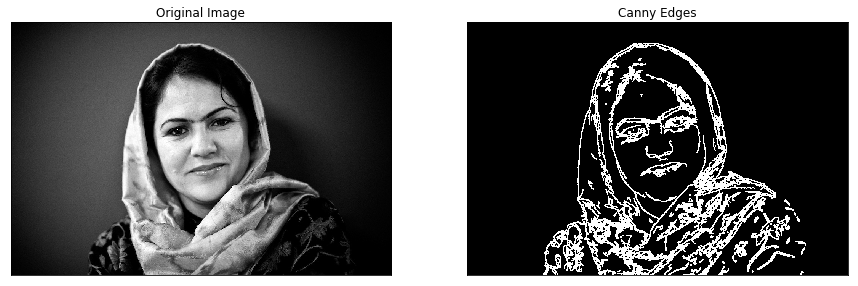

In [13]:
# Load in the image
image = cv2.imread('images/fawzia.jpg')

# Convert to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  

# Perform Canny edge detection
edges = cv2.Canny(gray,100,200)

# Dilate the image to amplify edges
edges = cv2.dilate(edges, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')

Without first blurring the image, and removing small, local structures, a lot of irrelevant edge content gets picked up and amplified by the detector (as shown in the right panel above). 

### (IMPLEMENTATION) Blur the image *then* perform edge detection

In the next cell, you will repeat this experiment - blurring the image first to remove these local structures, so that only the important boudnary details remain in the edge-detected image.

Blur the image by using OpenCV's ```filter2d``` functionality - which is discussed in [this documentation page](http://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html) - and use an *averaging kernel* of width equal to 4.

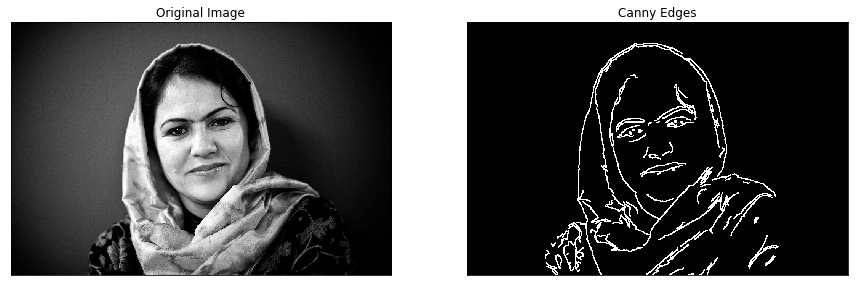

In [14]:
### TODO: Blur the test imageusing OpenCV's filter2d functionality, 
# Use an averaging kernel, and a kernel width equal to 4
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  

kernel = np.ones((4,4), np.float32) / 16
image_blurred = cv2.filter2D(gray, -1, kernel)
    
## TODO: Then perform Canny edge detection and display the output
edges = cv2.Canny(image_blurred,100,200)

# Dilate the image to amplify edges
edges = cv2.dilate(edges, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')


---
<a id='step4'></a>

## Step 4: Automatically Hide the Identity of an Individual

If you film something like a documentary or reality TV, you must get permission from every individual shown on film before you can show their face, otherwise you need to blur it out - by blurring the face a lot (so much so that even the global structures are obscured)!  This is also true for projects like [Google's StreetView maps](https://www.google.com/streetview/) - an enormous collection of mapping images taken from a fleet of Google vehicles.  Because it would be impossible for Google to get the permission of every single person accidentally captured in one of these images they blur out everyone's faces, the detected images must automatically blur the identity of detected people.  Here's a few examples of folks caught in the camera of a Google street view vehicle.

<img src="images/streetview_example_1.jpg" width=400 height=300/>
<img src="images/streetview_example_2.jpg" width=400 height=300/>


### Read in an image to perform identity detection

Let's try this out for ourselves.  Use the face detection pipeline built above and what you know about using the ```filter2D``` to blur and image, and use these in tandem to hide the identity of the person in the following image - loaded in and printed in the next cell. 

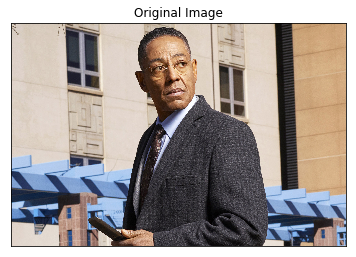

In [15]:
# Load in the image
image = cv2.imread('images/gus.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

### (IMPLEMENTATION) Use blurring to hide the identity of an individual in an image

The idea here is to 1) automatically detect the face in this image, and then 2) blur it out!  Make sure to adjust the parameters of the *averaging* blur filter to completely obscure this person's identity.

Number of faces detected: 1


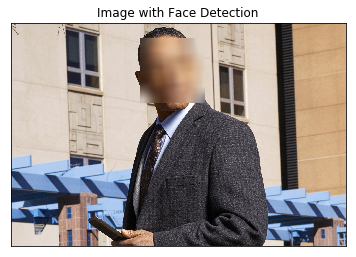

In [16]:
## TODO: Implement face detection
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

## TODO: Blur the bounding box around each detected face using an averaging filter and display the result
kernel = np.ones((100,100), np.float32) / 10000
# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    image_with_detections[y:y+h, x:x+w] = cv2.filter2D(image_with_detections[y:y+h, x:x+w], -1, kernel)

# Display the image with the detections
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detection')
ax1.imshow(image_with_detections)

### (Optional) Build identity protection into your laptop camera

In this optional task you can add identity protection to your laptop camera, using the previously completed code where you added face detection to your laptop camera - and the task above.  You should be able to get reasonable results with little parameter tuning - like the one shown in the gif below.

<img src="images/laptop_blurer_example.gif" width=400 height=300/>

As with the previous video task, to make this perfect would require significant effort - so don't strive for perfection here, strive for reasonable quality.  

The next cell contains code a wrapper function called ``laptop_camera_identity_hider`` that - when called  - will activate your laptop's camera.  You need to place the relevant face detection and blurring code developed above in this function in order to blur faces entering your laptop camera's field of view.

Before adding anything to the function you can call it to get a hang of how it works - a small window will pop up showing you the live feed from your camera, you can press any key to close this window.

**Note:** Mac users may find that activating this function kills the kernel of their notebook every once in a while.  If this happens to you, just restart your notebook's kernel, activate cell(s) containing any crucial import statements, and you'll be good to go!

In [17]:
### Insert face detection and blurring code into the wrapper below to create an identity protector on your laptop!
import cv2
import time 

def laptop_camera_go():
    # Extract the pre-trained face and eye detectors from xml files
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
    
    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.avi',fourcc, 10.0, (640,480))
    
    # Keep video stream open
    while rval:
        # Convert the RGB  image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

        # Detect the faces in image
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)
        
        # Make a copy of the orginal image to draw face detections on
        image_with_detections = np.copy(frame)

        # Get the bounding box for each detected face
        for (x,y,w,h) in faces:
            image_face_rect = gray[y:y+h, x:x+w]

            kernel = np.ones((50,50), np.float32) / 2500
            image_with_detections[y:y+h, x:x+w] = cv2.filter2D(image_with_detections[y:y+h, x:x+w], -1, kernel)
        
        # write the frame
        out.write(image_with_detections)

        # Plot the image from camera with all the face and eye detections marked
        cv2.imshow("face detection activated", image_with_detections)
        
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # Exit by pressing any key
            vc.release()
            out.release()

            # Destroy windows
            cv2.destroyAllWindows()
            
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    
        

In [18]:
# Run laptop identity hider
laptop_camera_go()

<img src="images/blur.gif" width=400 height=300/>

---
<a id='step5'></a>

## Step 5: Create a CNN to Recognize Facial Keypoints

OpenCV is often used in practice with other machine learning and deep learning libraries to produce interesting results.  In this stage of the project you will create your own end-to-end pipeline - employing convolutional networks in keras along with OpenCV - to apply a "selfie" filter to streaming video and images.  

You will start by creating and then training a convolutional network that can detect facial keypoints in a small dataset of cropped images of human faces.  We then guide you towards OpenCV to expanding your detection algorithm to more general images.  What are facial keypoints?  Let's take a look at some examples.

<img src="images/keypoints_test_results.png" width=400 height=300/>

Facial keypoints (also called facial landmarks) are the small blue-green dots shown on each of the faces in the image above - there are 15 keypoints marked in each image.  They mark important areas of the face - the eyes, corners of the mouth, the nose, etc.  Facial keypoints can be used in a variety of machine learning applications from face and emotion recognition to commercial applications like the image filters popularized by Snapchat.

Below we illustrate a filter that, using the results of this section, automatically places sunglasses on people in images (using the facial keypoints to place the glasses correctly on each face).  Here, the facial keypoints have been colored lime green for visualization purposes.

<img src="images/obamas_with_shades.png" width=1000 height=1000/>

### Make a facial keypoint detector

But first things first: how can we make a facial keypoint detector?  Well, at a high level, notice that facial keypoint detection is a *regression problem*.  A single face corresponds to a set of 15 facial keypoints (a set of 15 corresponding $(x, y)$ coordinates, i.e., an output point).  Because our input data are images, we can employ a *convolutional neural network* to recognize patterns in our images and learn how to identify these keypoint given sets of labeled data.

In order to train a regressor, we need a training set - a set of facial image / facial keypoint pairs to train on.  For this we will be using [this dataset from Kaggle](https://www.kaggle.com/c/facial-keypoints-detection/data). We've already downloaded this data and placed it in the `data` directory. Make sure that you have both the *training* and *test* data files.  The training dataset contains several thousand $96 \times 96$ grayscale images of cropped human faces, along with each face's 15 corresponding facial keypoints (also called landmarks) that have been placed by hand, and recorded in $(x, y)$ coordinates.  This wonderful resource also has a substantial testing set, which we will use in tinkering with our convolutional network.

To load in this data, run the Python cell below - notice we will load in both the training and testing sets.

The `load_data` function is in the included `utils.py` file.

In [19]:
from utils import *

# Load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))



Using TensorFlow backend.


X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
X_test.shape == (1783, 96, 96, 1)


The `load_data` function in `utils.py` originates from this excellent [blog post](http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/), which you are *strongly* encouraged to read.  Please take the time now to review this function.  Note how the output values - that is, the coordinates of each set of facial landmarks - have been normalized to take on values in the range $[-1, 1]$, while the pixel values of each input point (a facial image) have been normalized to the range $[0,1]$.  

Note: the original Kaggle dataset contains some images with several missing keypoints.  For simplicity, the `load_data` function removes those images with missing labels from the dataset.  As an __*optional*__ extension, you are welcome to amend the `load_data` function to include the incomplete data points. 

### Visualize the Training Data

Execute the code cell below to visualize a subset of the training data.

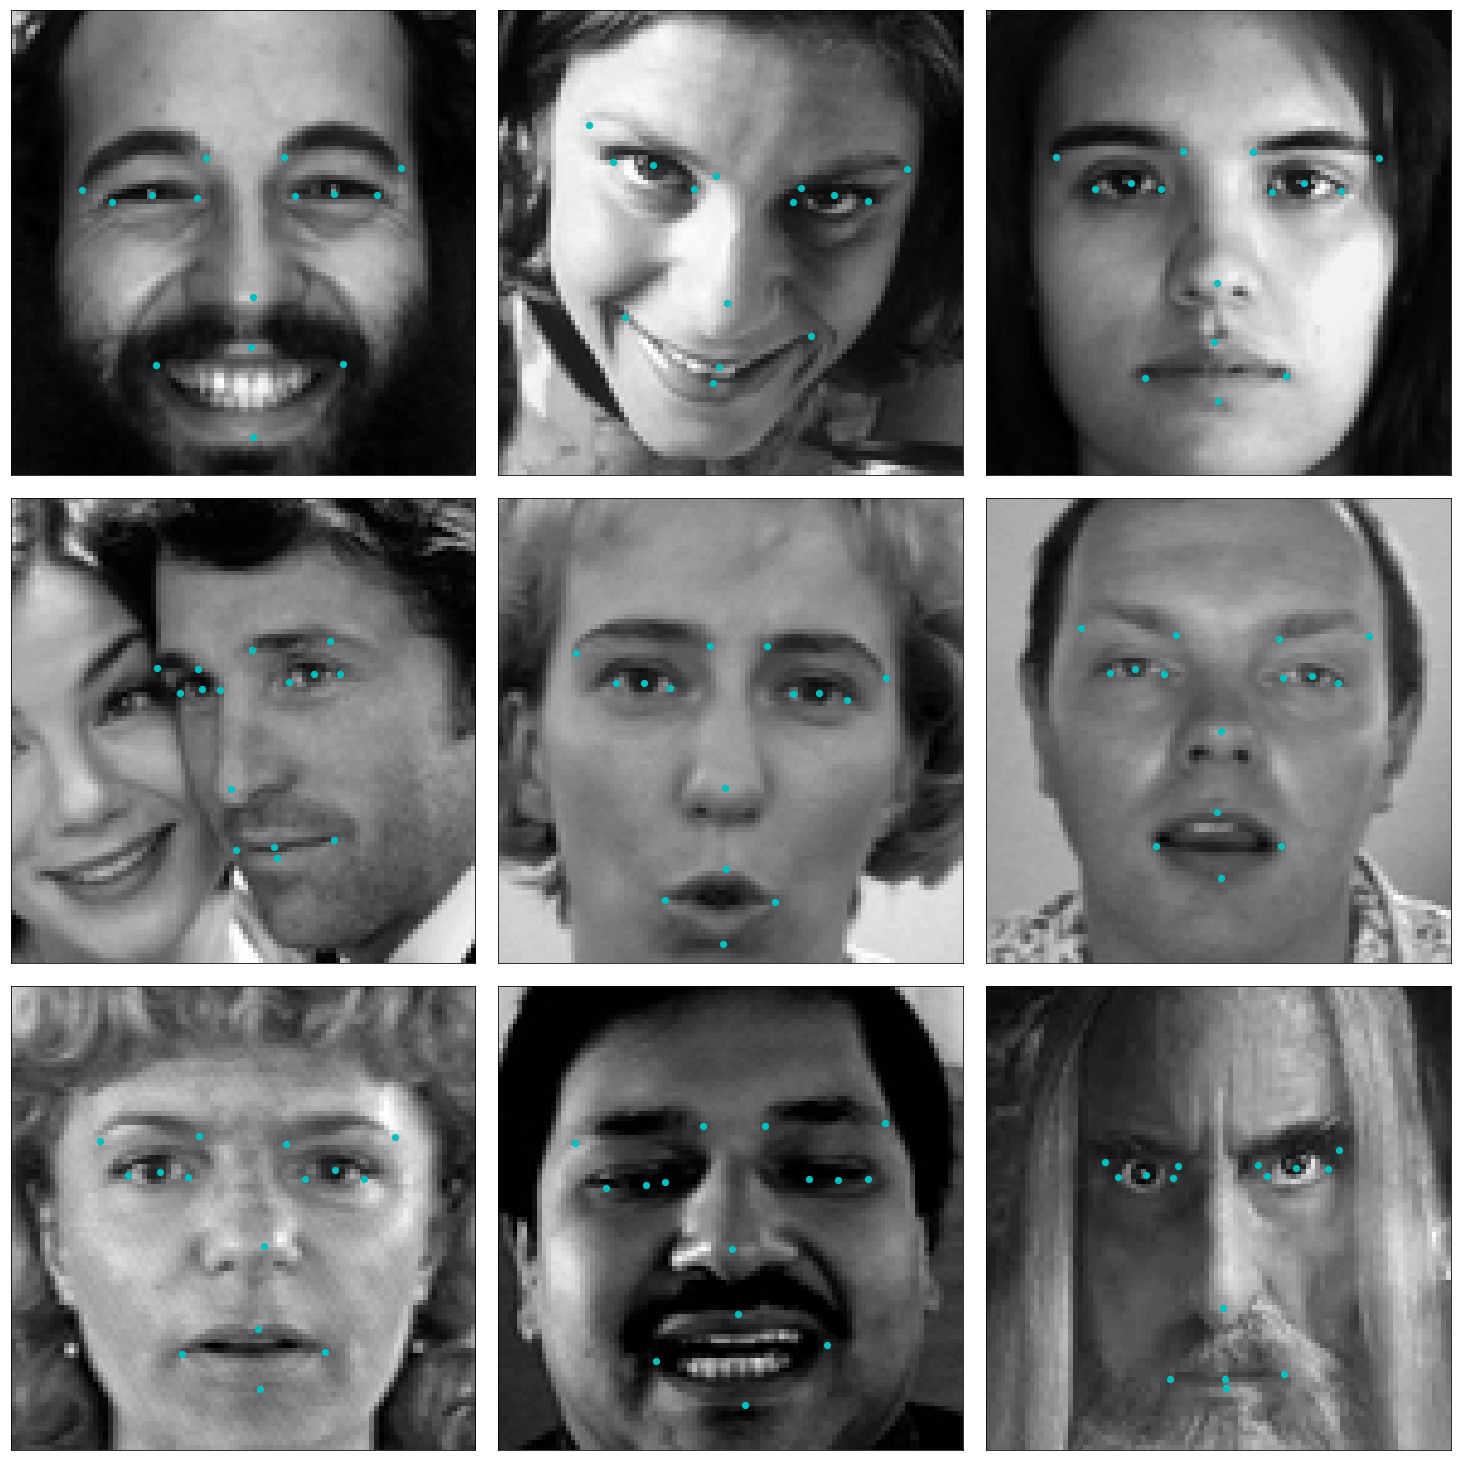

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_train[i], y_train[i], ax)

[ 0.4330242  -0.21624877 -0.34668279 -0.3463223   0.25858903 -0.1851669
  0.58100623 -0.1878271  -0.16970447 -0.23996718 -0.5165956  -0.35648429
  0.29375893 -0.24669313  0.74820185 -0.32774875 -0.07298451 -0.29718679
 -0.62243527 -0.51643556 -0.0278047   0.24908654  0.33497101  0.3931978
 -0.4643302   0.31000873 -0.06167792  0.52398473 -0.08612007  0.59259433]
[-0.4330242  -0.21624877  0.34668279 -0.3463223  -0.25858903 -0.1851669
 -0.58100623 -0.1878271   0.16970447 -0.23996718  0.5165956  -0.35648429
 -0.29375893 -0.24669313 -0.74820185 -0.32774875  0.07298451 -0.29718679
  0.62243527 -0.51643556  0.0278047   0.24908654 -0.33497101  0.3931978
  0.4643302   0.31000873  0.06167792  0.52398473  0.08612007  0.59259433]


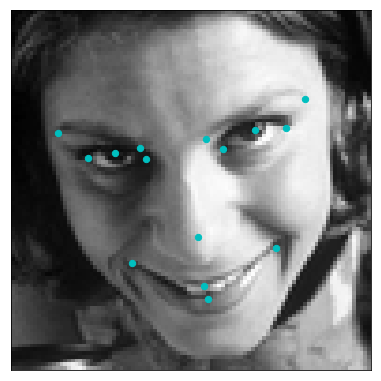

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

flip_indices = [
        (0, 2), (1, 3),
        (4, 8), (5, 9), (6, 10), (7, 11),
        (12, 16), (13, 17), (14, 18), (15, 19),
        (22, 24), (23, 25),
        ]

fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

i = 1
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
X_flipped = X_train[i, :, ::-1, :]  # simple slice to flip all images

print(y_train[i])

y_flipped = np.zeros(y_train.shape[1])

y_flipped[1::2] = y_train[i, 1::2]   
y_flipped[::2] = y_train[i, ::2] * -1.0

print(y_flipped)

# Swap places, e.g. left_eye_center_x -> right_eye_center_x
for a, b in flip_indices:
    y_flipped[a], y_flipped[b] = (
        y_flipped[b], y_flipped[a])

plot_data(X_flipped, y_flipped, ax)

For each training image, there are two landmarks per eyebrow (**four** total), three per eye (**six** total), **four** for the mouth, and **one** for the tip of the nose.  

Review the `plot_data` function in `utils.py` to understand how the 30-dimensional training labels in `y_train` are mapped to facial locations, as this function will prove useful for your pipeline.

### (IMPLEMENTATION) Specify the CNN Architecture

In this section, you will specify a neural network for predicting the locations of facial keypoints.  Use the code cell below to specify the architecture of your neural network.  We have imported some layers that you may find useful for this task, but if you need to use more Keras layers, feel free to import them in the cell.

Your network should accept a $96 \times 96$ grayscale image as input, and it should output a vector with 30 entries, corresponding to the predicted (horizontal and vertical) locations of 15 facial keypoints.  If you are not sure where to start, you can find some useful starting architectures in [this blog](http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/), but you are not permitted to copy any of the architectures that you find online.

In [25]:
# CNN architecture for training with no augmentation

# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Activation
from keras.layers import Flatten, Dense


## TODO: Specify a CNN architecture
# Your model should accept 96x96 pixel graysale images in
# It should have a fully-connected output layer with 30 values (2 for each facial keypoint)

modelNoAugm = Sequential()

modelNoAugm.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(96, 96, 1)))
modelNoAugm.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
modelNoAugm.add(MaxPooling2D(pool_size=2))
modelNoAugm.add(Dropout(0.3))

modelNoAugm.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
modelNoAugm.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
modelNoAugm.add(MaxPooling2D(pool_size=2))
modelNoAugm.add(Dropout(0.3))

modelNoAugm.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
modelNoAugm.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
modelNoAugm.add(MaxPooling2D(pool_size=2))
modelNoAugm.add(Dropout(0.3))

modelNoAugm.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
modelNoAugm.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
modelNoAugm.add(MaxPooling2D(pool_size=2))
modelNoAugm.add(Dropout(0.3))

modelNoAugm.add(Flatten())

modelNoAugm.add(Dense(500))
modelNoAugm.add(Activation('relu'))
modelNoAugm.add(Dropout(0.4))

modelNoAugm.add(Dense(30))

# Summarize the model
modelNoAugm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 64)        0         
__________

In [22]:
# CNN architecture for training on augmented data

# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Activation
from keras.layers import Flatten, Dense


## TODO: Specify a CNN architecture
# Your model should accept 96x96 pixel graysale images in
# It should have a fully-connected output layer with 30 values (2 for each facial keypoint)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(96, 96, 1)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))

model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(30))

# Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
__________

---
<a id='step6'></a>

## Step 6: Compile and Train the Model

After specifying your architecture, you'll need to compile and train the model to detect facial keypoints'

### (IMPLEMENTATION) Compile and Train the Model

Use the `compile` [method](https://keras.io/models/sequential/#sequential-model-methods) to configure the learning process.  Experiment with your choice of [optimizer](https://keras.io/optimizers/); you may have some ideas about which will work best (`SGD` vs. `RMSprop`, etc), but take the time to empirically verify your theories.

Use the `fit` [method](https://keras.io/models/sequential/#sequential-model-methods) to train the model.  Break off a validation set by setting `validation_split=0.2`.  Save the returned `History` object in the `history` variable.  

Your model is required to attain a validation loss (measured as mean squared error) of at least **XYZ**.  When you have finished training, [save your model](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) as an HDF5 file with file path `my_model.h5`.

In [23]:
# Get the validation set size (20%)
div = X_train.shape[0] // 5

# Split the data set to train and validation sets 
X_train_d, X_val = np.split(X_train, [X_train.shape[0] - div])
y_train_d, y_val = np.split(y_train, [y_train.shape[0] - div])


print("Train set X,y shapes: {}:{}".format(X_train_d.shape, y_train_d.shape))
print("Validation set X,y shapes: {}:{}".format(X_val.shape, y_val.shape))


Train set X,y shapes: (1712, 96, 96, 1):(1712, 30)
Validation set X,y shapes: (428, 96, 96, 1):(428, 30)


In [ ]:
# Training without augmentation  

from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import ModelCheckpoint

## TODO: Compile the model
modelNoAugm.compile(optimizer='adam', loss='mean_squared_error')

## TODO: Train the model

checkpointer = ModelCheckpoint(filepath='my_model.h5',
                               verbose=1, save_best_only=True)
  

hist = modelNoAugm.fit(X_train, y_train, 
          epochs=1000, batch_size=214, validation_split=0.2, callbacks=[checkpointer], verbose=2)

## TODO: Save the model as model.h5
modelNoAugm.load_weights('my_model.h5')

In [24]:
# Training with augmentation  

from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import ModelCheckpoint

BATCH_SIZE = 214
EPOCHS = 1500

## TODO: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

## TODO: Train the model

checkpointer = ModelCheckpoint(filepath='my_model.h5',
                               verbose=1, save_best_only=True)
  
flip_indices = [
        (0, 2), (1, 3),
        (4, 8), (5, 9), (6, 10), (7, 11),
        (12, 16), (13, 17), (14, 18), (15, 19),
        (22, 24), (23, 25),
        ]


# Generator function for augmented images 
def generator_train(X, y, batch_size):
    batch_X = np.zeros((batch_size, X.shape[1], X.shape[2], X.shape[3]))
    batch_y = np.zeros((batch_size, y.shape[1]))
    
    while True:
        batch_indices = np.random.choice(X.shape[0], batch_size, replace=False)
        batch_X[:, :, :, :] = X[batch_indices, :, :, :]
        
        # Flip half of the images
        indices = np.random.choice(batch_size, batch_size // 2, replace=False)
        batch_X[indices] = batch_X[indices, :, ::-1, :]

        batch_y[:, :] = y[batch_indices, :]
        
        # Flip x coordinates of the points:
        batch_y[indices, ::2] = batch_y[indices, ::2] * -1
        
        # Swap point places
        for a, b in flip_indices:
            batch_y[indices, a], batch_y[indices, b] = (
                batch_y[indices, b], batch_y[indices, a])

        yield batch_X, batch_y


hist = model.fit_generator(generator_train(X_train_d, y_train_d, batch_size=BATCH_SIZE),
                    steps_per_epoch=X_train_d.shape[0] // BATCH_SIZE,
                    epochs=EPOCHS, verbose=2, callbacks=[checkpointer],
                    validation_data=(X_val, y_val))




## TODO: Save the model as model.h5
model.load_weights('my_model.h5')

Epoch 1/1500
Epoch 00000: val_loss improved from inf to 0.05940, saving model to my_model.h5
7s - loss: 0.0811 - val_loss: 0.0594
Epoch 2/1500
Epoch 00001: val_loss improved from 0.05940 to 0.01382, saving model to my_model.h5
3s - loss: 0.0203 - val_loss: 0.0138
Epoch 3/1500
Epoch 00002: val_loss improved from 0.01382 to 0.00869, saving model to my_model.h5
3s - loss: 0.0132 - val_loss: 0.0087
Epoch 4/1500
Epoch 00003: val_loss improved from 0.00869 to 0.00772, saving model to my_model.h5
3s - loss: 0.0110 - val_loss: 0.0077
Epoch 5/1500
Epoch 00004: val_loss improved from 0.00772 to 0.00653, saving model to my_model.h5
3s - loss: 0.0098 - val_loss: 0.0065
Epoch 6/1500
Epoch 00005: val_loss improved from 0.00653 to 0.00557, saving model to my_model.h5
3s - loss: 0.0090 - val_loss: 0.0056
Epoch 7/1500
Epoch 00006: val_loss improved from 0.00557 to 0.00492, saving model to my_model.h5
3s - loss: 0.0086 - val_loss: 0.0049
Epoch 8/1500
Epoch 00007: val_loss did not improve
3s - loss: 0.00

Epoch 00081: val_loss did not improve
3s - loss: 0.0035 - val_loss: 0.0025
Epoch 83/1500
Epoch 00082: val_loss improved from 0.00227 to 0.00223, saving model to my_model.h5
3s - loss: 0.0033 - val_loss: 0.0022
Epoch 84/1500
Epoch 00083: val_loss did not improve
3s - loss: 0.0033 - val_loss: 0.0023
Epoch 85/1500
Epoch 00084: val_loss improved from 0.00223 to 0.00220, saving model to my_model.h5
3s - loss: 0.0033 - val_loss: 0.0022
Epoch 86/1500
Epoch 00085: val_loss improved from 0.00220 to 0.00206, saving model to my_model.h5
3s - loss: 0.0033 - val_loss: 0.0021
Epoch 87/1500
Epoch 00086: val_loss improved from 0.00206 to 0.00201, saving model to my_model.h5
4s - loss: 0.0031 - val_loss: 0.0020
Epoch 88/1500
Epoch 00087: val_loss did not improve
3s - loss: 0.0031 - val_loss: 0.0022
Epoch 89/1500
Epoch 00088: val_loss did not improve
3s - loss: 0.0031 - val_loss: 0.0022
Epoch 90/1500
Epoch 00089: val_loss improved from 0.00201 to 0.00186, saving model to my_model.h5
3s - loss: 0.0030 - 

Epoch 00155: val_loss did not improve
3s - loss: 0.0019 - val_loss: 0.0011
Epoch 157/1500
Epoch 00156: val_loss did not improve
3s - loss: 0.0019 - val_loss: 0.0011
Epoch 158/1500
Epoch 00157: val_loss did not improve
3s - loss: 0.0018 - val_loss: 0.0010
Epoch 159/1500
Epoch 00158: val_loss improved from 0.00103 to 0.00103, saving model to my_model.h5
3s - loss: 0.0018 - val_loss: 0.0010
Epoch 160/1500
Epoch 00159: val_loss improved from 0.00103 to 0.00102, saving model to my_model.h5
3s - loss: 0.0019 - val_loss: 0.0010
Epoch 161/1500
Epoch 00160: val_loss improved from 0.00102 to 0.00099, saving model to my_model.h5
3s - loss: 0.0018 - val_loss: 9.9125e-04
Epoch 162/1500
Epoch 00161: val_loss did not improve
3s - loss: 0.0018 - val_loss: 0.0010
Epoch 163/1500
Epoch 00162: val_loss did not improve
3s - loss: 0.0018 - val_loss: 0.0011
Epoch 164/1500
Epoch 00163: val_loss did not improve
3s - loss: 0.0019 - val_loss: 0.0010
Epoch 165/1500
Epoch 00164: val_loss did not improve
3s - loss:

Epoch 00236: val_loss did not improve
3s - loss: 0.0014 - val_loss: 8.9325e-04
Epoch 238/1500
Epoch 00237: val_loss did not improve
3s - loss: 0.0014 - val_loss: 8.1799e-04
Epoch 239/1500
Epoch 00238: val_loss improved from 0.00082 to 0.00081, saving model to my_model.h5
3s - loss: 0.0014 - val_loss: 8.1220e-04
Epoch 240/1500
Epoch 00239: val_loss did not improve
3s - loss: 0.0014 - val_loss: 8.7636e-04
Epoch 241/1500
Epoch 00240: val_loss did not improve
3s - loss: 0.0014 - val_loss: 8.1379e-04
Epoch 242/1500
Epoch 00241: val_loss improved from 0.00081 to 0.00080, saving model to my_model.h5
3s - loss: 0.0013 - val_loss: 7.9996e-04
Epoch 243/1500
Epoch 00242: val_loss improved from 0.00080 to 0.00079, saving model to my_model.h5
3s - loss: 0.0014 - val_loss: 7.8680e-04
Epoch 244/1500
Epoch 00243: val_loss did not improve
3s - loss: 0.0014 - val_loss: 8.0873e-04
Epoch 245/1500
Epoch 00244: val_loss did not improve
3s - loss: 0.0013 - val_loss: 8.4088e-04
Epoch 246/1500
Epoch 00245: val

Epoch 00315: val_loss did not improve
3s - loss: 0.0011 - val_loss: 7.5382e-04
Epoch 317/1500
Epoch 00316: val_loss did not improve
3s - loss: 0.0011 - val_loss: 7.1519e-04
Epoch 318/1500
Epoch 00317: val_loss did not improve
3s - loss: 0.0012 - val_loss: 7.2914e-04
Epoch 319/1500
Epoch 00318: val_loss did not improve
3s - loss: 0.0011 - val_loss: 7.1272e-04
Epoch 320/1500
Epoch 00319: val_loss did not improve
3s - loss: 0.0011 - val_loss: 7.0794e-04
Epoch 321/1500
Epoch 00320: val_loss did not improve
3s - loss: 0.0011 - val_loss: 7.1550e-04
Epoch 322/1500
Epoch 00321: val_loss did not improve
3s - loss: 0.0011 - val_loss: 7.1621e-04
Epoch 323/1500
Epoch 00322: val_loss did not improve
3s - loss: 0.0011 - val_loss: 7.2063e-04
Epoch 324/1500
Epoch 00323: val_loss improved from 0.00070 to 0.00069, saving model to my_model.h5
3s - loss: 0.0011 - val_loss: 6.9449e-04
Epoch 325/1500
Epoch 00324: val_loss did not improve
3s - loss: 0.0011 - val_loss: 7.1252e-04
Epoch 326/1500
Epoch 00325: v

Epoch 00397: val_loss did not improve
3s - loss: 9.2762e-04 - val_loss: 6.6988e-04
Epoch 399/1500
Epoch 00398: val_loss did not improve
3s - loss: 9.3276e-04 - val_loss: 6.5932e-04
Epoch 400/1500
Epoch 00399: val_loss did not improve
3s - loss: 9.2507e-04 - val_loss: 6.6358e-04
Epoch 401/1500
Epoch 00400: val_loss improved from 0.00064 to 0.00063, saving model to my_model.h5
3s - loss: 9.6304e-04 - val_loss: 6.2574e-04
Epoch 402/1500
Epoch 00401: val_loss improved from 0.00063 to 0.00062, saving model to my_model.h5
3s - loss: 9.4564e-04 - val_loss: 6.2156e-04
Epoch 403/1500
Epoch 00402: val_loss did not improve
3s - loss: 9.1425e-04 - val_loss: 6.6629e-04
Epoch 404/1500
Epoch 00403: val_loss did not improve
3s - loss: 9.0342e-04 - val_loss: 6.6656e-04
Epoch 405/1500
Epoch 00404: val_loss did not improve
3s - loss: 9.2420e-04 - val_loss: 6.5062e-04
Epoch 406/1500
Epoch 00405: val_loss did not improve
3s - loss: 9.2706e-04 - val_loss: 6.3398e-04
Epoch 407/1500
Epoch 00406: val_loss did 

Epoch 00477: val_loss did not improve
3s - loss: 7.7857e-04 - val_loss: 6.0651e-04
Epoch 479/1500
Epoch 00478: val_loss did not improve
3s - loss: 7.7257e-04 - val_loss: 6.4658e-04
Epoch 480/1500
Epoch 00479: val_loss did not improve
3s - loss: 8.3324e-04 - val_loss: 6.2087e-04
Epoch 481/1500
Epoch 00480: val_loss did not improve
3s - loss: 8.4103e-04 - val_loss: 6.4169e-04
Epoch 482/1500
Epoch 00481: val_loss did not improve
3s - loss: 7.9220e-04 - val_loss: 6.1217e-04
Epoch 483/1500
Epoch 00482: val_loss did not improve
3s - loss: 8.1378e-04 - val_loss: 6.0945e-04
Epoch 484/1500
Epoch 00483: val_loss did not improve
3s - loss: 8.1084e-04 - val_loss: 6.2325e-04
Epoch 485/1500
Epoch 00484: val_loss did not improve
3s - loss: 8.3256e-04 - val_loss: 6.3859e-04
Epoch 486/1500
Epoch 00485: val_loss did not improve
3s - loss: 8.0165e-04 - val_loss: 6.4101e-04
Epoch 487/1500
Epoch 00486: val_loss did not improve
3s - loss: 7.8870e-04 - val_loss: 6.2655e-04
Epoch 488/1500
Epoch 00487: val_los

Epoch 00559: val_loss did not improve
3s - loss: 7.2315e-04 - val_loss: 5.9359e-04
Epoch 561/1500
Epoch 00560: val_loss did not improve
3s - loss: 7.2098e-04 - val_loss: 5.8887e-04
Epoch 562/1500
Epoch 00561: val_loss did not improve
3s - loss: 7.4199e-04 - val_loss: 6.0212e-04
Epoch 563/1500
Epoch 00562: val_loss did not improve
3s - loss: 7.0801e-04 - val_loss: 5.9051e-04
Epoch 564/1500
Epoch 00563: val_loss did not improve
3s - loss: 7.4037e-04 - val_loss: 5.9454e-04
Epoch 565/1500
Epoch 00564: val_loss did not improve
3s - loss: 7.3215e-04 - val_loss: 6.0423e-04
Epoch 566/1500
Epoch 00565: val_loss did not improve
3s - loss: 7.1430e-04 - val_loss: 5.9747e-04
Epoch 567/1500
Epoch 00566: val_loss did not improve
3s - loss: 7.3282e-04 - val_loss: 5.8916e-04
Epoch 568/1500
Epoch 00567: val_loss did not improve
3s - loss: 7.3932e-04 - val_loss: 5.7881e-04
Epoch 569/1500
Epoch 00568: val_loss did not improve
3s - loss: 7.2093e-04 - val_loss: 6.0242e-04
Epoch 570/1500
Epoch 00569: val_los

Epoch 00642: val_loss did not improve
3s - loss: 6.7969e-04 - val_loss: 5.8958e-04
Epoch 644/1500
Epoch 00643: val_loss improved from 0.00056 to 0.00056, saving model to my_model.h5
3s - loss: 6.7642e-04 - val_loss: 5.6074e-04
Epoch 645/1500
Epoch 00644: val_loss did not improve
3s - loss: 6.8551e-04 - val_loss: 5.6369e-04
Epoch 646/1500
Epoch 00645: val_loss did not improve
3s - loss: 6.9032e-04 - val_loss: 5.6947e-04
Epoch 647/1500
Epoch 00646: val_loss did not improve
3s - loss: 6.8604e-04 - val_loss: 5.6904e-04
Epoch 648/1500
Epoch 00647: val_loss did not improve
3s - loss: 6.9270e-04 - val_loss: 5.7612e-04
Epoch 649/1500
Epoch 00648: val_loss did not improve
3s - loss: 6.9520e-04 - val_loss: 5.8418e-04
Epoch 650/1500
Epoch 00649: val_loss did not improve
3s - loss: 6.8124e-04 - val_loss: 5.7952e-04
Epoch 651/1500
Epoch 00650: val_loss did not improve
3s - loss: 7.0284e-04 - val_loss: 5.7651e-04
Epoch 652/1500
Epoch 00651: val_loss did not improve
3s - loss: 6.9577e-04 - val_loss: 

Epoch 00724: val_loss did not improve
3s - loss: 6.4829e-04 - val_loss: 5.9165e-04
Epoch 726/1500
Epoch 00725: val_loss did not improve
3s - loss: 6.7656e-04 - val_loss: 5.7286e-04
Epoch 727/1500
Epoch 00726: val_loss did not improve
3s - loss: 6.4850e-04 - val_loss: 5.6615e-04
Epoch 728/1500
Epoch 00727: val_loss did not improve
3s - loss: 6.4050e-04 - val_loss: 5.7059e-04
Epoch 729/1500
Epoch 00728: val_loss did not improve
3s - loss: 6.5012e-04 - val_loss: 5.7775e-04
Epoch 730/1500
Epoch 00729: val_loss did not improve
3s - loss: 6.8571e-04 - val_loss: 5.8305e-04
Epoch 731/1500
Epoch 00730: val_loss did not improve
3s - loss: 6.4821e-04 - val_loss: 5.6859e-04
Epoch 732/1500
Epoch 00731: val_loss did not improve
3s - loss: 6.5561e-04 - val_loss: 5.6447e-04
Epoch 733/1500
Epoch 00732: val_loss did not improve
3s - loss: 6.6676e-04 - val_loss: 5.9064e-04
Epoch 734/1500
Epoch 00733: val_loss did not improve
3s - loss: 6.5064e-04 - val_loss: 5.8100e-04
Epoch 735/1500
Epoch 00734: val_los

Epoch 00807: val_loss did not improve
3s - loss: 6.4672e-04 - val_loss: 6.0962e-04
Epoch 809/1500
Epoch 00808: val_loss did not improve
3s - loss: 6.6597e-04 - val_loss: 5.7197e-04
Epoch 810/1500
Epoch 00809: val_loss did not improve
3s - loss: 6.3617e-04 - val_loss: 5.5172e-04
Epoch 811/1500
Epoch 00810: val_loss did not improve
3s - loss: 6.3646e-04 - val_loss: 5.5208e-04
Epoch 812/1500
Epoch 00811: val_loss did not improve
3s - loss: 6.3155e-04 - val_loss: 5.8652e-04
Epoch 813/1500
Epoch 00812: val_loss did not improve
3s - loss: 6.3540e-04 - val_loss: 5.6877e-04
Epoch 814/1500
Epoch 00813: val_loss did not improve
3s - loss: 6.2472e-04 - val_loss: 5.7290e-04
Epoch 815/1500
Epoch 00814: val_loss did not improve
3s - loss: 6.4519e-04 - val_loss: 5.7586e-04
Epoch 816/1500
Epoch 00815: val_loss did not improve
3s - loss: 6.3181e-04 - val_loss: 5.6750e-04
Epoch 817/1500
Epoch 00816: val_loss did not improve
3s - loss: 6.3803e-04 - val_loss: 5.6666e-04
Epoch 818/1500
Epoch 00817: val_los

Epoch 00891: val_loss did not improve
3s - loss: 6.2518e-04 - val_loss: 5.6439e-04
Epoch 893/1500
Epoch 00892: val_loss did not improve
3s - loss: 6.3217e-04 - val_loss: 5.6188e-04
Epoch 894/1500
Epoch 00893: val_loss did not improve
3s - loss: 6.1525e-04 - val_loss: 5.5032e-04
Epoch 895/1500
Epoch 00894: val_loss did not improve
3s - loss: 6.2963e-04 - val_loss: 5.5365e-04
Epoch 896/1500
Epoch 00895: val_loss did not improve
3s - loss: 6.3983e-04 - val_loss: 5.6736e-04
Epoch 897/1500
Epoch 00896: val_loss did not improve
3s - loss: 6.4054e-04 - val_loss: 6.0026e-04
Epoch 898/1500
Epoch 00897: val_loss did not improve
3s - loss: 6.4930e-04 - val_loss: 5.8584e-04
Epoch 899/1500
Epoch 00898: val_loss did not improve
3s - loss: 6.5346e-04 - val_loss: 5.6447e-04
Epoch 900/1500
Epoch 00899: val_loss did not improve
3s - loss: 6.2066e-04 - val_loss: 5.6840e-04
Epoch 901/1500
Epoch 00900: val_loss did not improve
3s - loss: 6.3331e-04 - val_loss: 5.6869e-04
Epoch 902/1500
Epoch 00901: val_los

Epoch 00975: val_loss did not improve
3s - loss: 6.2564e-04 - val_loss: 5.7776e-04
Epoch 977/1500
Epoch 00976: val_loss did not improve
5s - loss: 6.1418e-04 - val_loss: 5.7978e-04
Epoch 978/1500
Epoch 00977: val_loss did not improve
16s - loss: 6.1275e-04 - val_loss: 5.7792e-04
Epoch 979/1500
Epoch 00978: val_loss did not improve
4s - loss: 6.3603e-04 - val_loss: 5.4922e-04
Epoch 980/1500
Epoch 00979: val_loss did not improve
4s - loss: 5.9860e-04 - val_loss: 5.7035e-04
Epoch 981/1500
Epoch 00980: val_loss did not improve
4s - loss: 6.1152e-04 - val_loss: 5.5880e-04
Epoch 982/1500
Epoch 00981: val_loss did not improve
4s - loss: 6.1616e-04 - val_loss: 5.7515e-04
Epoch 983/1500
Epoch 00982: val_loss did not improve
4s - loss: 6.1854e-04 - val_loss: 5.5041e-04
Epoch 984/1500
Epoch 00983: val_loss did not improve
4s - loss: 6.1349e-04 - val_loss: 5.5912e-04
Epoch 985/1500
Epoch 00984: val_loss did not improve
6s - loss: 6.2088e-04 - val_loss: 5.6127e-04
Epoch 986/1500
Epoch 00985: val_lo

Epoch 01058: val_loss did not improve
3s - loss: 6.1998e-04 - val_loss: 5.4611e-04
Epoch 1060/1500
Epoch 01059: val_loss did not improve
3s - loss: 5.6863e-04 - val_loss: 5.3951e-04
Epoch 1061/1500
Epoch 01060: val_loss did not improve
3s - loss: 6.0229e-04 - val_loss: 5.5320e-04
Epoch 1062/1500
Epoch 01061: val_loss did not improve
3s - loss: 6.0259e-04 - val_loss: 5.7893e-04
Epoch 1063/1500
Epoch 01062: val_loss did not improve
3s - loss: 5.9271e-04 - val_loss: 5.9247e-04
Epoch 1064/1500
Epoch 01063: val_loss did not improve
3s - loss: 6.1367e-04 - val_loss: 5.7016e-04
Epoch 1065/1500
Epoch 01064: val_loss did not improve
3s - loss: 6.1054e-04 - val_loss: 5.5722e-04
Epoch 1066/1500
Epoch 01065: val_loss did not improve
3s - loss: 5.9477e-04 - val_loss: 5.7524e-04
Epoch 1067/1500
Epoch 01066: val_loss did not improve
3s - loss: 6.0389e-04 - val_loss: 5.5127e-04
Epoch 1068/1500
Epoch 01067: val_loss did not improve
3s - loss: 5.9038e-04 - val_loss: 5.6364e-04
Epoch 1069/1500
Epoch 0106

Epoch 01141: val_loss did not improve
3s - loss: 5.8273e-04 - val_loss: 5.5066e-04
Epoch 1143/1500
Epoch 01142: val_loss did not improve
3s - loss: 5.9824e-04 - val_loss: 5.9091e-04
Epoch 1144/1500
Epoch 01143: val_loss did not improve
3s - loss: 5.9554e-04 - val_loss: 6.0168e-04
Epoch 1145/1500
Epoch 01144: val_loss did not improve
3s - loss: 6.1581e-04 - val_loss: 5.6771e-04
Epoch 1146/1500
Epoch 01145: val_loss did not improve
3s - loss: 6.1103e-04 - val_loss: 6.0834e-04
Epoch 1147/1500
Epoch 01146: val_loss did not improve
3s - loss: 6.0457e-04 - val_loss: 5.7247e-04
Epoch 1148/1500
Epoch 01147: val_loss did not improve
3s - loss: 5.9624e-04 - val_loss: 5.5361e-04
Epoch 1149/1500
Epoch 01148: val_loss did not improve
3s - loss: 5.8055e-04 - val_loss: 5.6792e-04
Epoch 1150/1500
Epoch 01149: val_loss did not improve
3s - loss: 6.0961e-04 - val_loss: 5.6476e-04
Epoch 1151/1500
Epoch 01150: val_loss did not improve
3s - loss: 6.0202e-04 - val_loss: 5.8772e-04
Epoch 1152/1500
Epoch 0115

Epoch 01224: val_loss did not improve
7s - loss: 5.7828e-04 - val_loss: 5.9244e-04
Epoch 1226/1500
Epoch 01225: val_loss did not improve
7s - loss: 5.8167e-04 - val_loss: 5.8285e-04
Epoch 1227/1500
Epoch 01226: val_loss did not improve
7s - loss: 6.0268e-04 - val_loss: 5.6962e-04
Epoch 1228/1500
Epoch 01227: val_loss did not improve
6s - loss: 5.8139e-04 - val_loss: 5.7253e-04
Epoch 1229/1500
Epoch 01228: val_loss did not improve
5s - loss: 5.7729e-04 - val_loss: 5.7540e-04
Epoch 1230/1500
Epoch 01229: val_loss did not improve
5s - loss: 5.9110e-04 - val_loss: 5.8059e-04
Epoch 1231/1500
Epoch 01230: val_loss did not improve
6s - loss: 5.9788e-04 - val_loss: 5.7373e-04
Epoch 1232/1500
Epoch 01231: val_loss did not improve
4s - loss: 5.7740e-04 - val_loss: 5.7524e-04
Epoch 1233/1500
Epoch 01232: val_loss did not improve
3s - loss: 5.7310e-04 - val_loss: 5.7153e-04
Epoch 1234/1500
Epoch 01233: val_loss did not improve
3s - loss: 5.6605e-04 - val_loss: 5.8542e-04
Epoch 1235/1500
Epoch 0123

Epoch 01307: val_loss did not improve
3s - loss: 5.6015e-04 - val_loss: 5.7228e-04
Epoch 1309/1500
Epoch 01308: val_loss did not improve
3s - loss: 5.6905e-04 - val_loss: 5.6183e-04
Epoch 1310/1500
Epoch 01309: val_loss did not improve
3s - loss: 5.9477e-04 - val_loss: 5.8364e-04
Epoch 1311/1500
Epoch 01310: val_loss did not improve
3s - loss: 5.8075e-04 - val_loss: 5.9057e-04
Epoch 1312/1500
Epoch 01311: val_loss did not improve
3s - loss: 5.8600e-04 - val_loss: 5.6894e-04
Epoch 1313/1500
Epoch 01312: val_loss did not improve
3s - loss: 5.8351e-04 - val_loss: 5.4472e-04
Epoch 1314/1500
Epoch 01313: val_loss did not improve
3s - loss: 5.7159e-04 - val_loss: 5.8957e-04
Epoch 1315/1500
Epoch 01314: val_loss did not improve
3s - loss: 5.7809e-04 - val_loss: 5.8107e-04
Epoch 1316/1500
Epoch 01315: val_loss did not improve
3s - loss: 5.7032e-04 - val_loss: 5.5177e-04
Epoch 1317/1500
Epoch 01316: val_loss did not improve
3s - loss: 5.8556e-04 - val_loss: 5.6444e-04
Epoch 1318/1500
Epoch 0131

Epoch 01390: val_loss did not improve
3s - loss: 5.6707e-04 - val_loss: 5.8416e-04
Epoch 1392/1500
Epoch 01391: val_loss did not improve
3s - loss: 5.8210e-04 - val_loss: 5.5984e-04
Epoch 1393/1500
Epoch 01392: val_loss did not improve
3s - loss: 5.8546e-04 - val_loss: 5.6249e-04
Epoch 1394/1500
Epoch 01393: val_loss did not improve
3s - loss: 5.8558e-04 - val_loss: 5.6953e-04
Epoch 1395/1500
Epoch 01394: val_loss did not improve
3s - loss: 5.8338e-04 - val_loss: 5.8555e-04
Epoch 1396/1500
Epoch 01395: val_loss did not improve
3s - loss: 6.0331e-04 - val_loss: 5.7067e-04
Epoch 1397/1500
Epoch 01396: val_loss did not improve
3s - loss: 5.6253e-04 - val_loss: 5.7318e-04
Epoch 1398/1500
Epoch 01397: val_loss did not improve
3s - loss: 5.9023e-04 - val_loss: 5.9451e-04
Epoch 1399/1500
Epoch 01398: val_loss did not improve
3s - loss: 5.7847e-04 - val_loss: 6.2787e-04
Epoch 1400/1500
Epoch 01399: val_loss did not improve
3s - loss: 5.9174e-04 - val_loss: 5.8288e-04
Epoch 1401/1500
Epoch 0140

Epoch 01473: val_loss did not improve
3s - loss: 5.6513e-04 - val_loss: 5.9284e-04
Epoch 1475/1500
Epoch 01474: val_loss did not improve
3s - loss: 5.7764e-04 - val_loss: 6.3485e-04
Epoch 1476/1500
Epoch 01475: val_loss did not improve
3s - loss: 5.8154e-04 - val_loss: 5.6494e-04
Epoch 1477/1500
Epoch 01476: val_loss did not improve
3s - loss: 5.7851e-04 - val_loss: 5.9405e-04
Epoch 1478/1500
Epoch 01477: val_loss did not improve
3s - loss: 5.6407e-04 - val_loss: 6.0223e-04
Epoch 1479/1500
Epoch 01478: val_loss did not improve
3s - loss: 5.8636e-04 - val_loss: 5.9635e-04
Epoch 1480/1500
Epoch 01479: val_loss did not improve
3s - loss: 5.6187e-04 - val_loss: 5.6960e-04
Epoch 1481/1500
Epoch 01480: val_loss did not improve
3s - loss: 5.7533e-04 - val_loss: 5.5613e-04
Epoch 1482/1500
Epoch 01481: val_loss did not improve
3s - loss: 5.7787e-04 - val_loss: 5.9883e-04
Epoch 1483/1500
Epoch 01482: val_loss did not improve
3s - loss: 5.2598e-04 - val_loss: 5.8297e-04
Epoch 1484/1500
Epoch 0148

---
<a id='step7'></a>

## Step 7: Visualize the Loss and Test Predictions

### (IMPLEMENTATION)  Answer a few questions and visualize the loss

__Question 1:__ Outline the steps you took to get to your final neural network architecture and your reasoning at each step.

__Answer:__ I started with a simple CNN architecture: 2 convolutional layers with 32 and 64 filters interleaved with pooling layers, one fully-connected layer and one output layer with the size equal to the number of X and Y keypoint coordinates (2 * 15 = 30). This is a regression problem so, obviously, the loss function must be 'mean_squared_error'. To combat overfitting, I used dropout layers. With the initial architecture, I got the validation accuracy around 0.0015. Then I was experimenting  with the number of convolutional and fully-connected layers, dropout rate, mini batch size and the number of epochs. My final no-augmentation CNN architecture is shown above in cell 25: modelNoAugm. With that model, I got the validation accuracy equal to 0.00064. In order to improve it even more, I augmented the training data by applying horizontal flip transformation to the original training images, as it was suggested in [the blog](http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/). Flipped images are obtained on the fly by transforming 50% of the batch images in the function generator_train. To avoid overfitting on the increased number of training images I slightly increased dropout rates of some CNN layers. With data augmentation, the validation loss improved to 0.000534 and this validation accuracy seems to be very good compared to the accuracy values obtained by the author of the blog.    


__Question 2:__ Defend your choice of optimizer.  Which optimizers did you test, and how did you determine which worked best?

__Answer:__ I tested adam, adadelta and rmsprop. I got the best results using 'adam' with the default parameters. With the RMSprop optimizer the CNN was not converging well and after 1000 epoch the loss and val_loss values were still around 0.0044. Maybe this particular CNN architecture is not good for the RMSProp optmizer or I should have used different parameters. I did not investigate it much because I got excellent results with 'adam'. The 'adadelta' was my number one choice after it proved to be very effective and worked very well for my dog project's CNN. Unfortunately, for this regression problem it did not work well: CNN models converged very slowly, the best val. loss value I got was something around 0.001 after 1000 epochs. I spent a lot of time tweaking the CNN architecture but finally realized that the problem could be in the optimizer. 


Use the code cell below to plot the training and validation loss of your neural network.  You may find [this resource](http://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/) useful.

dict_keys(['val_loss', 'loss'])


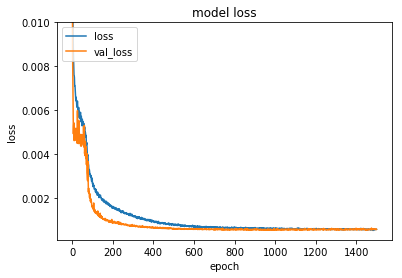

In [27]:
## TODO: Visualize the training and validation loss of your neural network
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(hist.history.keys())

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(1e-4, 1e-2)
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

__Question 3:__  Do you notice any evidence of overfitting or underfitting in the above plot?  If so, what steps have you taken to improve your model?  Note that slight overfitting or underfitting will not hurt your chances of a successful submission, as long as you have attempted some solutions towards improving your model (such as _regularization, dropout, increased/decreased number of layers, etc_).

__Answer:__ In my model overfitting happens only at the very end of the training process. I used dropout layers to combat overfitting in my CNN.

### Visualize a Subset of the Test Predictions

Execute the code cell below to visualize your model's predicted keypoints on a subset of the testing images.

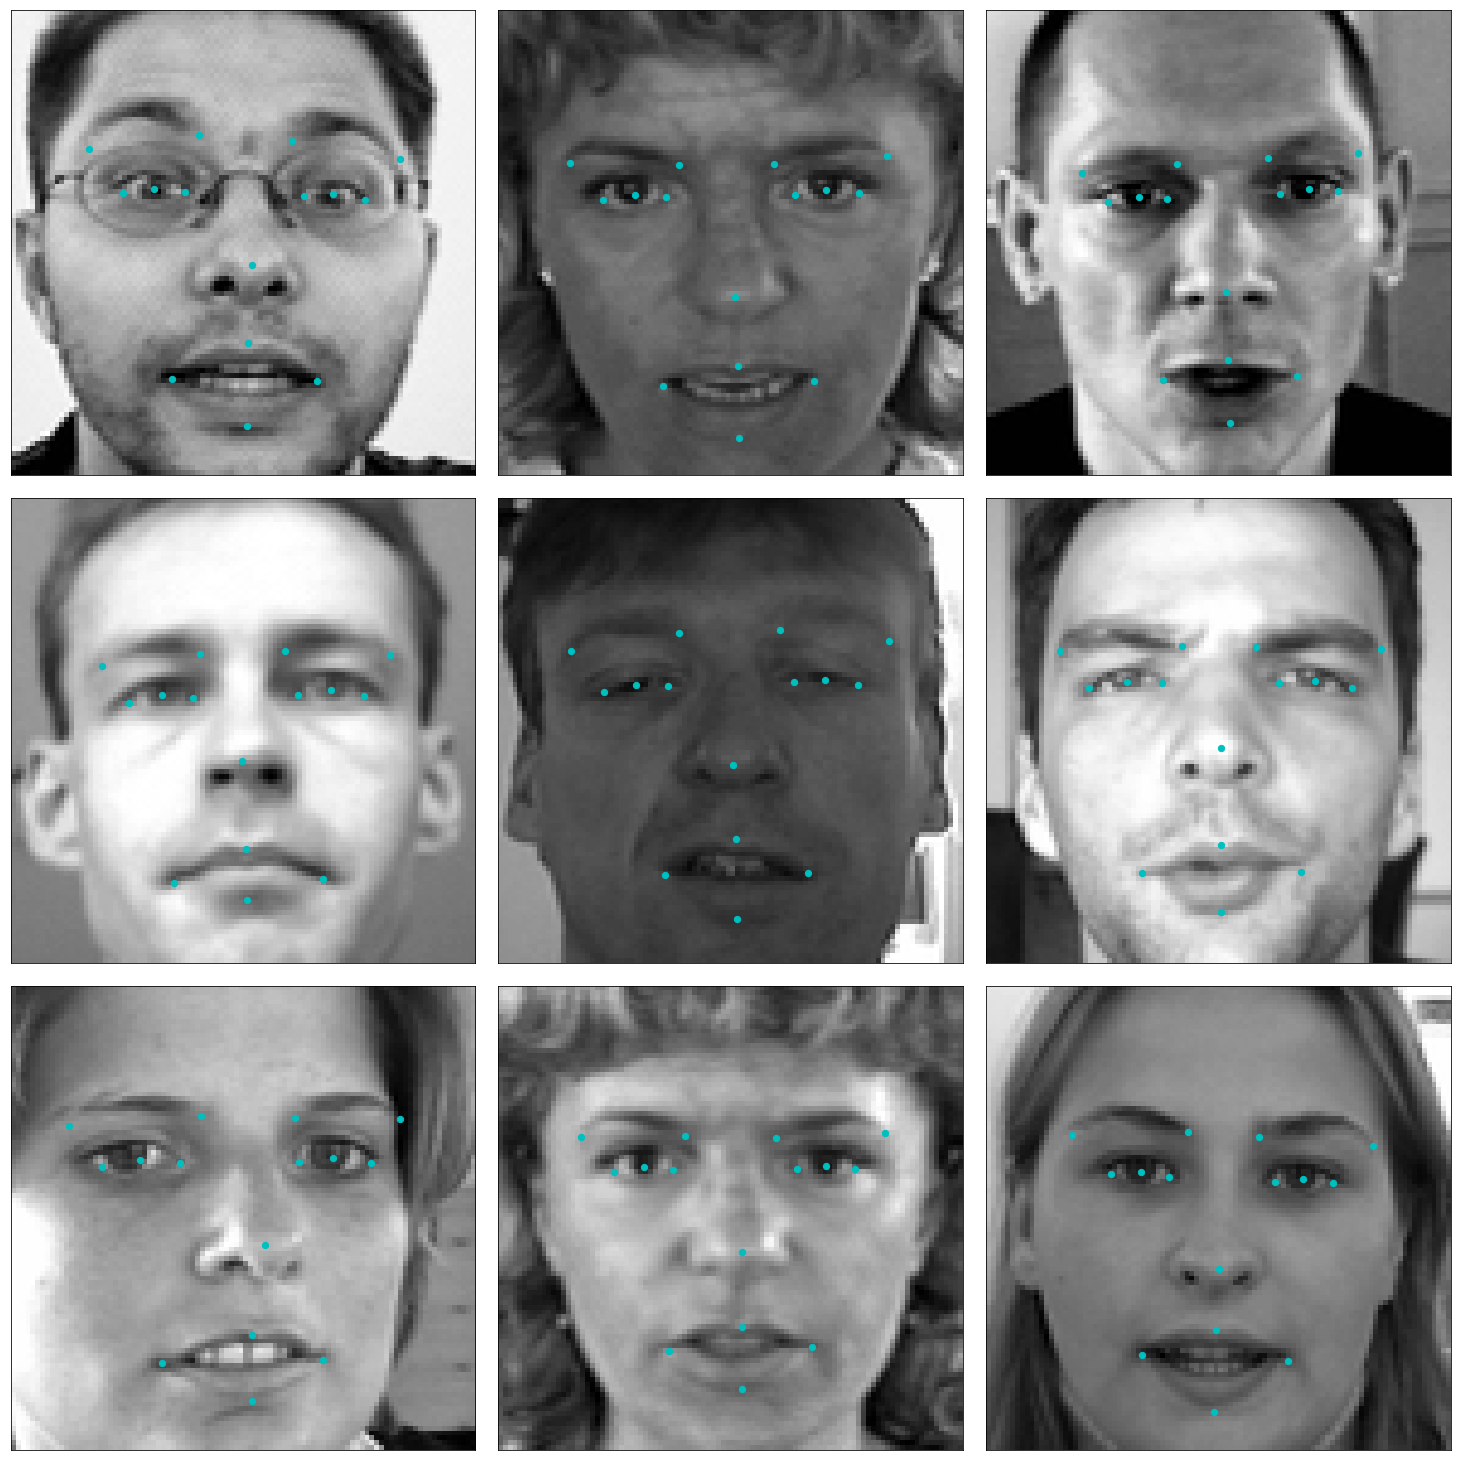

In [28]:
y_test = model.predict(X_test)
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_test[i], y_test[i], ax)

---
<a id='step8'></a>

## Step 8: Complete the pipeline

With the work you did in Sections 1 and 2 of this notebook, along with your freshly trained facial keypoint detector, you can now complete the full pipeline.  That is given a color image containing a person or persons you can now 

- Detect the faces in this image automatically using OpenCV
- Predict the facial keypoints in each face detected in the image
- Paint predicted keypoints on each face detected

In this Subsection you will do just this!  

### (IMPLEMENTATION) Facial Keypoints Detector

Use the OpenCV face detection functionality you built in previous Sections to expand the functionality of your keypoints detector to color images with arbitrary size.  Your function should perform the following steps

1. Accept a color image.
2. Convert the image to grayscale.
3. Detect and crop the face contained in the image.
4. Locate the facial keypoints in the cropped image.
5. Overlay the facial keypoints in the original (color, uncropped) image.

**Note**: step 4 can be the trickiest because remember your convolutional network is only trained to detect facial keypoints in $96 \times 96$ grayscale images where each pixel was normalized to lie in the interval $[0,1]$, and remember that each facial keypoint was normalized during training to the interval $[-1,1]$.  This means - practically speaking - to paint detected keypoints onto a test face you need to perform this same pre-processing to your candidate face  - that is after detecting it you should resize it to $96 \times 96$ and normalize its values before feeding it into your facial keypoint detector.  To be shown correctly on the original image the output keypoints from your detector then need to be shifted and re-normalized from the interval $[-1,1]$ to the width and height of your detected face.

When complete you should be able to produce example images like the one below

<img src="images/obamas_with_keypoints.png" width=1000 height=1000/>

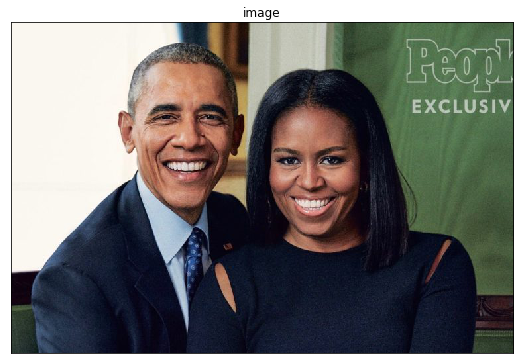

In [29]:
# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')


# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image')
ax1.imshow(image)



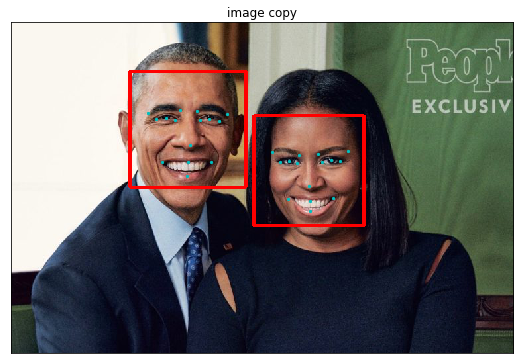

In [30]:
### TODO: Use the face detection code we saw in Section 1 with your trained conv-net 

# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

image_copy = np.copy(image)

coord_X = list()
coord_Y = list()
# Get the bounding box for each detected face
for (x,y,w,h) in faces:
 
    # Crop the face image
    face_image = gray[y:y+h, x:x+w]
    face_image = cv2.resize(face_image, (96, 96), interpolation=cv2.INTER_CUBIC)

    # Scale pixels and reshape for prediction
    X = face_image / 255.
    X = X.astype(np.float32)
    X = X.reshape(-1, 96, 96, 1)
    
    # Predict keypoints
    res = model.predict(X)
    
    # Get keypoint coordinates on the original image
    res_X = np.squeeze(res)[0::2] * w / 2 + w / 2 + x
    res_Y = np.squeeze(res)[1::2] * h / 2 + h / 2 + y  
    
    # Save the coordinates 
    coord_X.append(np.array(res_X))
    coord_Y.append(np.array(res_Y))
    
    # Add a red bounding box to the detections image
    cv2.rectangle(image_copy, (x,y), (x+w,y+h), (255,0,0), 3)
    

    
# Plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image copy')
ax1.imshow(image_copy)

## TODO : Paint the predicted keypoints on the test image
keypoints_X = np.array(coord_X)
keypoints_Y = np.array(coord_Y)
ax1.scatter(keypoints_X, keypoints_Y, marker='o', c='c', s=5)



### (Optional) Further Directions - add a filter using facial keypoints to your laptop camera

Now you can add facial keypoint detection to your laptop camera - as illustrated in the gif below.

<img src="images/facial_keypoint_test.gif" width=400 height=300/>

The next Python cell contains the basic laptop video camera function used in the previous optional video exercises.  Combine it with the functionality you developed for keypoint detection and marking in the previous exercise and you should be good to go!

In [31]:
import cv2
import time 
from keras.models import load_model
def laptop_camera_go():
    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Extract the pre-trained face detector from an xml file
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.avi',fourcc, 10.0, (640,480))
    
    # keep video stream open
    while rval:
        # Convert the RGB  image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

        # Detect the faces in image
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)

        image_copy = np.copy(frame)

        # Get the bounding box for each detected face
        for (x,y,w,h) in faces:
 
            # Crop the face image
            face_image = gray[y:y+h, x:x+w]
            face_image = cv2.resize(face_image, (96, 96), interpolation=cv2.INTER_CUBIC)

            # Scale pixels and reshape for prediction
            X = face_image / 255.
            X = X.astype(np.float32)
            X = X.reshape(-1, 96, 96, 1)
    
            # Predict keypoints
            res = model.predict(X)
    
            # Get keypoint coordinates on the original image
            res_X = np.squeeze(res)[0::2] * w / 2 + w / 2 + x
            res_Y = np.squeeze(res)[1::2] * h / 2 + h / 2 + y  
    
            for i, c_x in enumerate(res_X):
                cv2.circle(image_copy, (int(c_x), int(res_Y[i])), 2, (0,255,0), -1)
        
            # Add a red bounding box to the detections image
            cv2.rectangle(image_copy, (x,y), (x+w,y+h), (255,0,0), 3)
            
        # write the frame
        out.write(image_copy)
            
        # plot image from camera with detections marked
        cv2.imshow("face detection activated", image_copy)
        
        # exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # exit by pressing any key
            vc.release()
            out.release()

            # destroy windows
            cv2.destroyAllWindows()
            
            # hack from stack overflow for making sure window closes on osx --> https://stackoverflow.com/questions/6116564/destroywindow-does-not-close-window-on-mac-using-python-and-opencv
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()  

In [32]:
# Run your keypoint face painter
laptop_camera_go()

<img src="images/keypoints.gif" width=400 height=300/>

### (Optional) Further Directions - add a filter using facial keypoints

Using your freshly minted facial keypoint detector pipeline you can now do things like add fun filters to a person's face automatically.  In this optional exercise you can play around with adding sunglasses automatically to each individual's face in an image as shown in a demonstration image below.

<img src="images/obamas_with_shades.png" width=1000 height=1000/>

To produce this effect an image of a pair of sunglasses shown in the Python cell below.

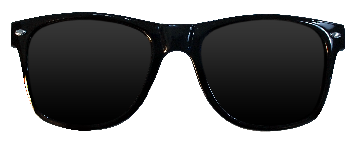

In [33]:
# Load in sunglasses image - note the usage of the special option
# cv2.IMREAD_UNCHANGED, this option is used because the sunglasses 
# image has a 4th channel that allows us to control how transparent each pixel in the image is
sunglasses = cv2.imread("images/sunglasses_4.png", cv2.IMREAD_UNCHANGED)

# Plot the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(sunglasses)
ax1.axis('off');

This image is placed over each individual's face using the detected eye points to determine the location of the sunglasses, and eyebrow points to determine the size that the sunglasses should be for each person (one could also use the nose point to determine this).  

Notice that this image actually has *4 channels*, not just 3. 

In [34]:
# Print out the shape of the sunglasses image
print ('The sunglasses image has shape: ' + str(np.shape(sunglasses)))

The sunglasses image has shape: (1123, 3064, 4)


It has the usual red, blue, and green channels any color image has, with the 4th channel representing the transparency level of each pixel in the image.  Here's how the transparency channel works: the lower the value, the more transparent the pixel will become.  The lower bound (completely transparent) is zero here, so any pixels set to 0 will not be seen. 

This is how we can place this image of sunglasses on someone's face and still see the area around of their face where the sunglasses lie - because these pixels in the sunglasses image have been made completely transparent.

Lets check out the alpha channel of our sunglasses image in the next Python cell.  Note because many of the pixels near the boundary are transparent we'll need to explicitly print out non-zero values if we want to see them. 

In [35]:
# Print out the sunglasses transparency (alpha) channel
alpha_channel = sunglasses[:,:,3]
print ('the alpha channel here looks like')
print (alpha_channel)

# Just to double check that there are indeed non-zero values
# Let's find and print out every value greater than zero
values = np.where(alpha_channel != 0)
print ('\n the non-zero values of the alpha channel look like')
print (values)

the alpha channel here looks like
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]

 the non-zero values of the alpha channel look like
(array([  17,   17,   17, ..., 1109, 1109, 1109], dtype=int64), array([ 687,  688,  689, ..., 2376, 2377, 2378], dtype=int64))


This means that when we place this sunglasses image on top of another image, we can use the transparency channel as a filter to tell us which pixels to overlay on a new image (only the non-transparent ones with values greater than zero).

One last thing: it's helpful to understand which keypoint belongs to the eyes, mouth, etc. So, in the image below, we also display the index of each facial keypoint directly on the image so that you can tell which keypoints are for the eyes, eyebrows, etc.

<img src="images/obamas_points_numbered.png" width=500 height=500/>

With this information, you're well on your way to completing this filtering task!  See if you can place the sunglasses automatically on the individuals in the image loaded in / shown in the next Python cell.

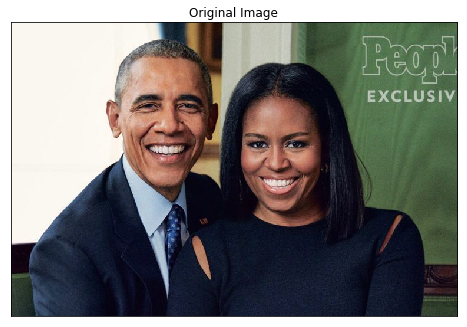

In [36]:
# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Plot the image
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

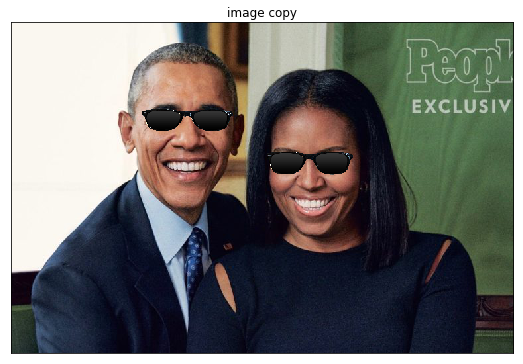

In [37]:
## (Optional) TODO: Use the face detection code we saw in Section 1 with your trained conv-net to put
## sunglasses on the individuals in our test image

# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')

sunglasses = cv2.imread("images/sunglasses_4.png", cv2.IMREAD_UNCHANGED)

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

image_copy = np.copy(image)

# Glasses scale value
SCALE_COEFF = 1.15

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
 
    # Crop the face image
    face_image = gray[y:y+h, x:x+w]
    face_image = cv2.resize(face_image, (96, 96), interpolation=cv2.INTER_CUBIC)

    # Scale pixels and reshape for prediction
    X = face_image / 255.
    X = X.astype(np.float32)
    X = X.reshape(-1, 96, 96, 1)
    
    # Predict keypoints
    res = model.predict(X)
    
    # Get keypoint coordinates on the original image
    res_X = np.squeeze(res)[0::2] * w / 2 + w / 2 + x
    res_Y = np.squeeze(res)[1::2] * h / 2 + h / 2 + y  
    
    # Calculate the size of the glasses using the facial keypoints that belong to eyes
    glasses_width = int((res_X[7] - res_X[9]) * SCALE_COEFF)
    glasses_height = 2 * int(SCALE_COEFF * (max(res_Y[5], res_Y[1], res_Y[4]) - min(res_Y[9], res_Y[8])))
    
    scaled_glasses = cv2.resize(sunglasses, (glasses_width, glasses_height), interpolation=cv2.INTER_CUBIC)

    # overlay the glasses image on the original image
    y_t = int(min(res_Y[9], res_Y[8]))
    y_b = y_t + glasses_height
    x_l = int((res_X[7] + res_X[9]) / 2 - glasses_width / 2)
    x_r = x_l + glasses_width
            
    alpha_glasses = scaled_glasses[:, :, 3] / 255.0
    alpha_image = 1.0 - alpha_glasses

    for c in range(0, 3):
        image_copy[y_t:y_b, x_l:x_r, c] = (alpha_glasses * scaled_glasses[:, :, c] +
                              alpha_image * image_copy[y_t:y_b, x_l:x_r, c])
    
# Plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image copy')
ax1.imshow(image_copy)


###  (Optional) Further Directions - add a filter using facial keypoints to your laptop camera 

Now you can add the sunglasses filter to your laptop camera - as illustrated in the gif below.

<img src="images/mr_sunglasses.gif" width=250 height=250/>

The next Python cell contains the basic laptop video camera function used in the previous optional video exercises.  Combine it with the functionality you developed for adding sunglasses to someone's face in the previous optional exercise and you should be good to go!

In [38]:
import cv2
import time 
from keras.models import load_model
import numpy as np

# Glasses scale value
SCALE_COEFF = 1.15

def laptop_camera_go():
    sunglasses = cv2.imread("images/sunglasses_4.png", cv2.IMREAD_UNCHANGED)

    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.avi',fourcc, 10.0, (640,480))
    
    # Keep video stream open
    while rval:
        # Convert the RGB  image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

        # Detect the faces in image
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)

        image_copy = np.copy(frame)

        # Get the bounding box for each detected face
        for (x,y,w,h) in faces:
 
            # Crop the face image
            face_image = gray[y:y+h, x:x+w]
            face_image = cv2.resize(face_image, (96, 96), interpolation=cv2.INTER_CUBIC)

            # Scale pixels and reshape for prediction
            X = face_image / 255.
            X = X.astype(np.float32)
            X = X.reshape(-1, 96, 96, 1)
    
            # Predict keypoints
            res = model.predict(X)
    
            # Get keypoint coordinates on the original image
            res_X = np.squeeze(res)[0::2] * w / 2 + w / 2 + x
            res_Y = np.squeeze(res)[1::2] * h / 2 + h / 2 + y  
    
             # Calculate the size of the glasses using points 7 and 9
            glasses_width = int((res_X[7] - res_X[9]) * SCALE_COEFF)
            glasses_height = 2 * int(SCALE_COEFF * (max(res_Y[5], res_Y[1], res_Y[4]) - min(res_Y[9], res_Y[8])))
    
            scaled_glasses = cv2.resize(sunglasses, (glasses_width, glasses_height), interpolation=cv2.INTER_CUBIC)

            # overlay the glasses image on the original image
            y_t = int(min(res_Y[9], res_Y[8]))
            y_b = y_t + glasses_height
            x_l = int((res_X[7] + res_X[9]) / 2 - glasses_width / 2)
            x_r = x_l + glasses_width

            alpha_glasses = scaled_glasses[:, :, 3] / 255.0
            alpha_image = 1.0 - alpha_glasses

            for c in range(0, 3):
                image_copy[y_t:y_b, x_l:x_r, c] = (alpha_glasses * scaled_glasses[:, :, c] +
                              alpha_image * image_copy[y_t:y_b, x_l:x_r, c])

        # write the frame
        out.write(image_copy)
            
        # plot image from camera with detections marked
        cv2.imshow("face detection activated", image_copy)
        
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # exit by pressing any key
            vc.release()
            out.release()

            # Destroy windows 
            cv2.destroyAllWindows()
            
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    
        

In [39]:
# Load facial landmark detector model
model = load_model('my_model.h5')

# Run sunglasses painter
laptop_camera_go()

<img src="images/sunglasses.gif" width=400 height=300/>